# Session 8: Genetic Algorithms, Particle Swarm Optimization

## Introduction

**Genetic Algorithms**:\
These are an adaptive heuristic search algorithm that belong to a larger part of evolutionary algorithms

Commonly used to generate high quality solutions for optimization problems and search problems. More specifically, they *simulate the process of natural selection* which means those species who can adapt to changes in their environment are able to survive and reproduce

**Foundations**
- Individuals in population compete for resources and mate
- Individuals who are successful then mate to create more offspring
- Genes from 'fittest' parent propagate throughout the generation
- Each successive generation is more suited for their environment

**Fitness Score** is given to each individual which shows the ability of an individual to 'compete'. Individuals who have optimal fitness scores are sought.

Each new generation has on average more 'better genes' than the individual (solution) of previous generations. So each generation has better *partial solutions*. This occurs until a convergence.

**Operators of GAs**
- Selection Operator: give prederence to the individuals with good fitness scores
- Crossover Operator: represents mating between individuals
- Mutation Operator: insert random genes in offspring to maintain diversity in the population to avoid premature convergence

This algorithm has potential to get stuck at a local optimum solution. This can be further improved by updating fitness score calculation or by tweaking mutation and crossover operators

### Problem 1: Describe the main features of GA's:
Simulate the process of natural selection and are able to converge into a target. Genetic Algorithms can deal with various types of optimization whether the objective function is stationary or non-stationary, etc. 

- Formulation of a Fitness function
- Use of population size
- Choice of important parameters such as rate of mutation and crossover
- Selection criteria of the new population

Easy for the algorithm to converge to a non-ideal result.

### Problem 2: GA's and the Prisoner's Dilemma
Key idea is the evolution of strategies within games. Not realistic to assume that individuals can fully analyze the situation and calculate an optimal strategy so instead, they can adapt their strategy over time based on what has been effective and what has not

This paper shows how the genetic algorithm can discover complex and effective strategies to the prisoner's dilemma game.

- Under what conditions does cooperation emerge in a world of egoists without central authority?
- Axelrod creates a tournament with different competitors for an iterated prisoner's dilemma
- One idea was an iterated prisoner's dilemma of length unknown to the players. If the expected length of the game is sufficiently long, defecting is no longer dominant
- as a robustness check, Axelrod sets up a dynamical 'ecological' tournament.
- Initially, many different strategies are represented. In later rounds, the number of copies of each strategy entered into the round is proportional to the average score obtained by the program.
- GA is used as a basis for finding the best strategy. For the tournament, we are looking for collective stability instead of a nash equilibrium
- Strategy is collectively stable is no strategy can invade it. TIT for TAT is collectively stable if the expected length of the game is sufficiently long
- Any strategy that could be the first to cooperate is only stable if the expected length of the interaction is long enough

### Problem 3: Schema Theorem

Short, low order schemata with above-average fitness increase exponentially in frequency in successive generations. This typically comes from the assumption that a correlation exists between parents and offspring fitnesses.

- Schemata: sets of 'similar' chromosomes / partitions of genome space
- Schema Theory describes how schemata are *expected* to propagate from one generation to the next

Schema can be used to identify subset of strings with similarities at certain string positions

the schema with above average fitness, short defining length and lower order is more likely to survive

### Problem 4: Average Fitness of Schema
NOTE: technically, we have a length of 0 as we define the length of a schema as the distance between the first and last bits

$$ f(H,k) = \frac{\sum_{x \in H} f(x)}{m(H,k)}$$

where H is the schema, k is the generation, m(H,k) is the count of individuals in the kth generation, f(H,k) is the average fitness, and f(x) is the fitness value of x.

In our example, we have a total number of 8 possible combinations in the generation. our fitness values are then 8,9, $\dots$, 15. Using the formula, we then get $92/8 = 11.5$.

For the 0 case, we would obtain a value of 3.5.

### Problem 5: The Union of Schema

When we want to take the union of two sets, the sets need to contain all members of **either** set. The intersection contains all members of **both**. Any schema is a set whose size is a power of 2. We need to look at where the defined bits are. Consider

1\*1\*0\*\* \
1\*0\*\*\*\*

If we were to take the union, then we would have 1\*\*\*_\*\*

This would not work as we wouldn't be able to fill the blank space. If the two disagree about the value of a defined bit (either 1 or 0), then the result must have a * there. 

### Problem 6: Which of the following offspring can not be created by one point crossover?

What is **one point crossover**? A  random crossover point is selected and the tails of its two parents are swapped to get new off-springs

We have parents 000000 and 111111. 

In this case, a one point crossover would not result in 110011 or 011110

### Problem 7: Selection in Genetic Algorithms

**Roulette Wheel Selection**: 

### Problem 8: GA and Particle Filters

### Problem 9: Markov Chain Analysis

### Problem 10: GA and Genetic Programming

Largely the same, but genetic programming creates programs  to solve a certain problem. GP is a branch of GA. GA modifies a solution. 

### Problem 11: Applying Genetic Programming 

In [1]:
!pip install deap

     |████████████████████████████████| 109 kB 1.1 MB/s eta 0:00:01


In [25]:
!pip install UliEngineering

     |████████████████████████████████| 69 kB 698 kB/s eta 0:00:01
  Created wheel for UliEngineering: filename=UliEngineering-0.3.7-py3-none-any.whl size=90966 sha256=c2301b68f9323023d0215b85c1bf803e64c8736602abba8426c621f74e3e2159
  Stored in directory: /Users/Ivan/Library/Caches/pip/wheels/8b/c0/b0/19a975cac554fc528674aaf51875a2785da04762bf1265e601
Successfully built UliEngineering


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import deap
import random as rd

from UliEngineering.SignalProcessing.Simulation import sine_wave


In [61]:
# Generation of data

in_array = np.linspace(0, 2 * np.pi, 200)
y = []
cos = []
sin = []
e = np.random.normal(0,0.2,200)

for i in range(len(in_array)):
    cos.append(math.cos(2*in_array[i]))
    sin.append(math.sin(in_array[i]))
    y.append(sin[i] + cos[i] + e[i])
    i += 1

df = pd.DataFrame({'Output': y, 'Input': in_array})
df.head()

,Output,Input
0,0.963114,0.000000
1,1.130262,0.031574
2,0.823157,0.063148
3,1.143370,0.094721
4,1.382332,0.126295


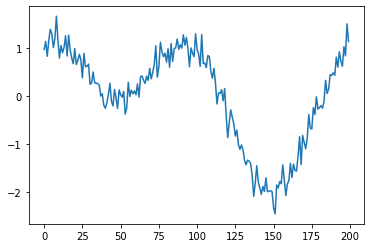

In [68]:
plt.plot(df['Output'])

To model a process using an evolutionary algorithm, we need a **candidate model**, basically, an assumption or 'inductive bias' about what kind of model we are searching for. In this case, we look at the data and try to fit a sin function to it because thats what seems likely.

**Some General GA Steps**:
1. Initialize the population with characteristics you'd like to explore
2. Calculate the fitness of all units/individuals in the population
3. Sample the `parents` with sampling weights based on fitness
4. The population from steps 4 become he children from the previous generation. repeat steps 2-4.

In [71]:
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import array

Now we need to define the individual, strategy, and fitness as datatypes

In [79]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

/Users/Ivan/opt/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/Ivan/opt/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [80]:
def generateES(ind_cls, strg_cls, size):
    ind = ind_cls(random.normal() for i in range(size))
    ind.strategy = strg_cls(random.normal() for i in range(size))
    return ind

toolbox = base.Toolbox()

IND_SIZE = 5
NGEN = 100
# generation functions
toolbox.register("individual", generateES, creator.Individual, creator.Strategy, IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# evolutionary ops
toolbox.register("mate", tools.cxESBlend, alpha=0.1)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

def pred(ind, x):
    
    y_ = 0.0
    
    for i in range(1,IND_SIZE):
        y_ += ind[i-1]*x**i
    
    y_ += ind[IND_SIZE-1]
       
    return y_

def fitness(ind, data):
    
    mse = 0.0
    
    for x, y in data:
        
        y_ = pred(ind, x)
        mse += (y - y_)**2
        
    return mse/len(data),

# fitness eval
toolbox.register("evaluate", fitness, data=data)b

### Problem 12: Particle Swarm Optimization
We are focusing on the collective behavior of simple organisms and their interaction with the environment.

PSO focuses on a group of birds. Birds are hungry and are searching for food. These hungry birds can be correlated with the tasks in a computation system which are hungry for resources. One food particle. The best approach to finding the food is to follow the birds which are nearest to the food particle.



### Problem 13: Simulating trail laying ants
-  aingle any is walking at a time and it leaves a weight of 1 pheromone on the path
- An any always chooses the dge that holds the most pheromones
- If there isno pheromones, the ant chooses an edge randomly

### Problem 14: 
- Instill short term memory into the ant
- Distinguish its own pheromone from other ants 
- Making it more likely to ignore under a certain level of pheromone

### Problem 15:

### Problem 16:
Ant Colony optimization implementation on traveling salesman problem. Here you have cities as the nodes or the distances as the nodes.